In [1]:
#imports
import time
start_time = time.time()

import numpy as np
from matplotlib import pyplot as plt
import os.path
import sys
from scipy.stats import chisquare, pearsonr
from keras.utils import normalize, to_categorical
from sklearn.preprocessing import scale
import pandas as pd

print("--- %s seconds ---" % (time.time() - start_time))

Using TensorFlow backend.


--- 7.56579327583313 seconds ---


In [2]:
# find path to files
EDataPath = os.path.abspath("~/ExtendedNeutrinoData/extended_full_CNN_input.txt")

#print("in the data file is: ",os.listdir("/home/willett/ExtendedNeutrinoData/"))

In [3]:
#creating clean array store from data!
pls = open('/home/willett/ExtendedNeutrinoData/extended_full_CNN_input.txt',"r")

#titles:
title = pls.readline()
title = pls.readline()
title = title.replace("*","")

#print(title)
newtitle =  "Row sigBg  FirstLayer_H  LastLayer_H NHits_H  AverageZP_H  Thrust_H  PID_Angle_H  PID_Front_H  PID_LLR_M_H  FirstLayer_L  LastLayer_L  NHits_L  AverageZP_L  Thrust_L  PID_Angle_L  PID_Front_L  PID_LLR_M_L  Energy_As  Angle_Bet Distance  ECal_Time  TotHitCha_H  EM_Energy_H  IsShowerL_H  PID_Trunc_H  PID_Trans_H  PID_Shower_H  PID_LLR_M_H  PID_Circu_H  ObjectLen_H  ThrustAxi_H  TotHitCha_L  EM_Energy_L  IsShower_L  PID_Trunc_L  PID_Trans_L  PID_Shower_L  PID_LLR_M_L  PID_Circu_L  ObjectLen_L  ThrustAxi_L "
finaltitle = "Sig Bg FirstLayer_H  LastLayer_H NHits_H  AverageZP_H  Thrust_H  PID_Angle_H  PID_Front_H  PID_LLR_M_H  FirstLayer_L  LastLayer_L  NHits_L  AverageZP_L  Thrust_L  PID_Angle_L  PID_Front_L  PID_LLR_M_L  Energy_As  Angle_Bet Distance  ECal_Time  TotHitCha_H  EM_Energy_H  IsShowerL_H  PID_Trunc_H  PID_Trans_H  PID_Shower_H  PID_LLR_M_H  PID_Circu_H  ObjectLen_H  ThrustAxi_H  TotHitCha_L  EM_Energy_L  IsShower_L  PID_Trunc_L  PID_Trans_L  PID_Shower_L  PID_LLR_M_L  PID_Circu_L  ObjectLen_L  ThrustAxi_L "
titlez = "FirstLayer_H  LastLayer_H NHits_H  AverageZP_H  Thrust_H  PID_Angle_H  PID_Front_H  PID_LLR_M_H  FirstLayer_L  LastLayer_L  NHits_L  AverageZP_L  Thrust_L  PID_Angle_L  PID_Front_L  PID_LLR_M_L  Energy_As  Angle_Bet Distance  ECal_Time  TotHitCha_H  EM_Energy_H  IsShowerL_H  PID_Trunc_H  PID_Trans_H  PID_Shower_H  PID_LLR_M_H  PID_Circu_H  ObjectLen_H  ThrustAxi_H  TotHitCha_L  EM_Energy_L  IsShower_L  PID_Trunc_L  PID_Trans_L  PID_Shower_L  PID_LLR_M_L  PID_Circu_L  ObjectLen_L  ThrustAxi_L "
titleArr = titlez.split()
start_time = time.time()

Ext = np.genfromtxt("/home/willett/ExtendedNeutrinoData/extended_full_CNN_input.txt", delimiter="*",skip_header=3, skip_footer=1)
print("--- %s seconds ---" % (time.time() - start_time))

print(Ext.shape)

--- 3.6353518962860107 seconds ---
(57851, 44)


In [4]:
# removing pointless row row and final/inital asterisk
print(Ext.shape)
print(Ext[0,:])
print(type(Ext[0,0]))

Ext2 = Ext[:,2:43]

print(Ext2.shape)
print(Ext2[0,:])

(57851, 44)
[           nan  0.0000000e+00 -9.9900000e+02  9.0000000e+00
  3.0000000e+01  2.6000000e+01  6.1138464e+02  9.9445040e-01
  4.9888916e+01  6.7961200e-02  3.4687889e+01  2.0000000e+00
  3.1000000e+01  1.4000000e+01  5.7600000e+02  9.6934470e-01
  4.9888916e+01  6.7961200e-02  1.3910054e+00  7.5552750e-01
  1.7113097e+00  6.7944533e+02  5.1269500e-02  1.1317453e+01
  6.2807773e+01  1.0000000e+00  4.6287090e-01  9.0816160e-01
  1.3836670e-01 -5.2310120e+00  4.5797020e-01  5.1695629e+02
  7.6750420e-01  8.6442352e+01  4.5101510e+02  1.0000000e+00
  1.0051900e-01  1.1468765e+00  8.8481000e-03  1.7868120e+01
  8.2249240e-01  3.8340145e+02 -7.3976700e-01            nan]
<class 'numpy.float64'>
(57851, 41)
[-9.9900000e+02  9.0000000e+00  3.0000000e+01  2.6000000e+01
  6.1138464e+02  9.9445040e-01  4.9888916e+01  6.7961200e-02
  3.4687889e+01  2.0000000e+00  3.1000000e+01  1.4000000e+01
  5.7600000e+02  9.6934470e-01  4.9888916e+01  6.7961200e-02
  1.3910054e+00  7.5552750e-01  1.71

In [5]:
# replaceing nan with 0
Ext2 = np.nan_to_num(Ext2)

In [6]:
# signal to one hot vector SigBg [10 or-999] becomes sig, bg [1,0] or [0,1]
Length = 57851

SignalIndex= np.where(Ext2[:,0] == 10)
SigBgBi = np.zeros((Length,1))
np.put(SigBgBi,SignalIndex,1)
print(SignalIndex)

OH= to_categorical(SigBgBi, num_classes=2)
OH = np.flip(OH,axis = 1)
print(OH[0:7,])


(array([    6,    81,    94, ..., 57733, 57736, 57742]),)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [7]:
#split to data
Data = Ext2[:,1:50]
Data.shape

(57851, 40)

In [8]:
# normalize usings sklearn mean = 0 variance = 1
Data2 = normalize(Data, order=2)
print(Data[:,0],"\n",Data2[:,0])

[ 9. 18.  2. ... 11.  3.  2.] 
 [0.00669747 0.00383949 0.00049194 ... 0.00274689 0.00119306 0.00080189]


/home/willett/anaconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/linalg/linalg.py:2286: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/home/willett/anaconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/linalg/linalg.py:2287: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))


In [9]:
# after that fiasco ^ lets split into small, test and train.
ExtOutWidth = Data2.shape[1]+2

#recombine signalBG and data
ExtOut = np.zeros((Length,ExtOutWidth))
ExtOut[:,0:2] = OH
ExtOut[:,2:50000000] = Data2

TrainLength = int(0.9* Length)

# split
small = ExtOut[0:250,:]
print("small:",small.shape)
train = ExtOut[250:(TrainLength+250),:]
print("train:",train.shape)
test = ExtOut[(TrainLength+250):,:]
print("test:",test.shape)

#print(TrainLength)
#ExtOut[0,:]

small: (250, 42)
train: (52065, 42)
test: (5536, 42)


In [10]:
# and save

#small
start_time = time.time()
np.savetxt("/home/willett/ExtendedNeutrinoData/extended_small_CNN_input_processed.txt",small, header= finaltitle)
print("--- %s seconds ---" % (time.time() - start_time))

#train
start_time = time.time()
np.savetxt("/home/willett/ExtendedNeutrinoData/extended_train_CNN_input_processed.txt",train, header= finaltitle)
print("--- %s seconds ---" % (time.time() - start_time))

#test
start_time = time.time()
np.savetxt("/home/willett/ExtendedNeutrinoData/extended_test_CNN_input_processed.txt",test, header= finaltitle)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.06746244430541992 seconds ---
--- 3.5381920337677 seconds ---
--- 0.4426689147949219 seconds ---


## check correlations so "same" variable not used twice

In [11]:
# Convert feature matrix into DataFrame
df = pd.DataFrame(Data2, )

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.999)]

print(to_drop)

#what needs to be dropped?
for i in range(len(to_drop)):
    print(titleArr[to_drop[i]])


[12, 13, 14, 16, 17, 22, 23, 24, 25, 27, 29, 32, 33, 34, 35, 37, 39]
Thrust_L
PID_Angle_L
PID_Front_L
Energy_As
Angle_Bet
IsShowerL_H
PID_Trunc_H
PID_Trans_H
PID_Shower_H
PID_Circu_H
ThrustAxi_H
IsShower_L
PID_Trunc_L
PID_Trans_L
PID_Shower_L
PID_Circu_L
ThrustAxi_L


In [12]:
# remove those columns
ColumnDropIndex = np.array(to_drop)
Data3 = np.delete(Data2,ColumnDropIndex,axis = 1 )
Data3.shape
Data3titleArr = np.delete(titleArr,ColumnDropIndex)
print(Data3titleArr)
print(Data3[0,:])

# combine with sigbg
ExtOut2Width = Data3.shape[1]+2

#recombine signalBG and data
ExtOut2 = np.zeros((Length,ExtOut2Width))
ExtOut2[:,0:2] = OH
ExtOut2[:,2:50000000] = Data3

['FirstLayer_H' 'LastLayer_H' 'NHits_H' 'AverageZP_H' 'Thrust_H'
 'PID_Angle_H' 'PID_Front_H' 'PID_LLR_M_H' 'FirstLayer_L' 'LastLayer_L'
 'NHits_L' 'AverageZP_L' 'PID_LLR_M_L' 'Distance' 'ECal_Time'
 'TotHitCha_H' 'EM_Energy_H' 'PID_LLR_M_H' 'ObjectLen_H' 'TotHitCha_L'
 'EM_Energy_L' 'PID_LLR_M_L' 'ObjectLen_L']
[ 6.69747260e-03  2.23249087e-02  1.93482542e-02  4.54970208e-01
  7.40033812e-04  3.71255164e-02  5.05742528e-05  2.58134651e-02
  1.48832724e-03  2.30690723e-02  1.04182907e-02  4.28638246e-01
  1.03513562e-03  5.05618498e-01  3.81528968e-05  8.42203682e-03
  4.67392599e-02 -3.89272884e-03  3.84700065e-01  6.43272538e-02
  3.35629031e-01  1.32968049e-02  2.85313412e-01]


In [13]:
# remove wierd anamolous datapoint
ExtOut3 = np.delete(ExtOut2,np.where(ExtOut2[:,4]<-0.1), axis=0)
print(ExtOut2.shape)
print(ExtOut3.shape)

(57851, 25)
(57561, 25)


## look at the data with eyeballs

In [14]:
#pick dataset to plot
UD = ExtOut3

#seperate signal and background
UDSig = UD[   np.where(    UD[:,0]==1     )   ]
UDBg = UD[   np.where(    UD[:,0]!=1     )   ]
print(UDSig.shape, UDBg.shape)

(1424, 25) (56137, 25)


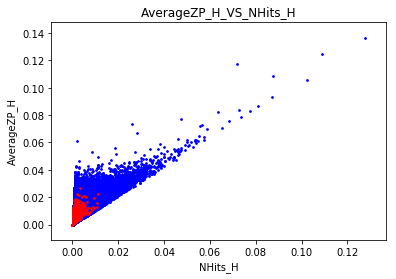

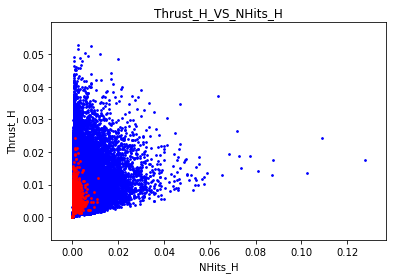

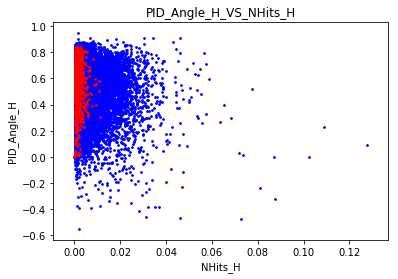

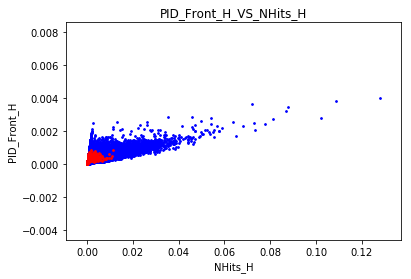

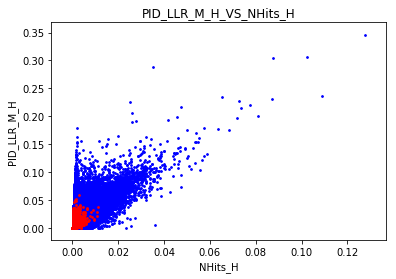

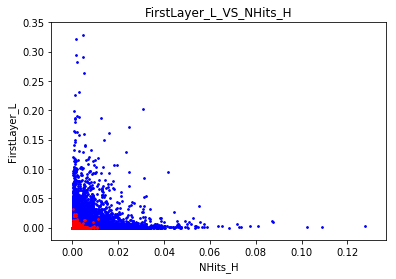

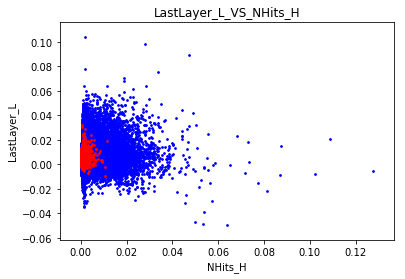

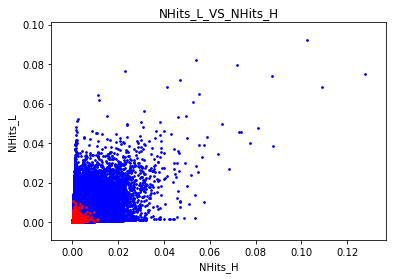

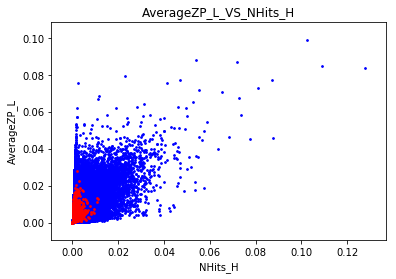

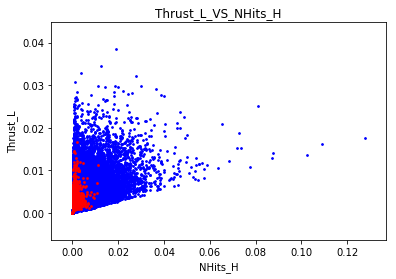

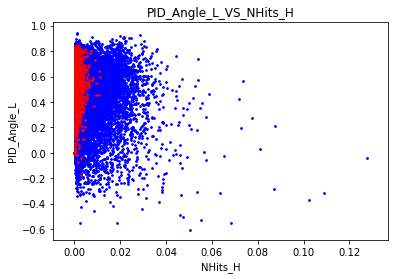

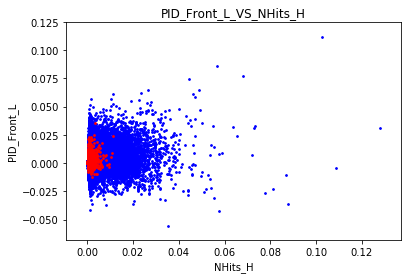

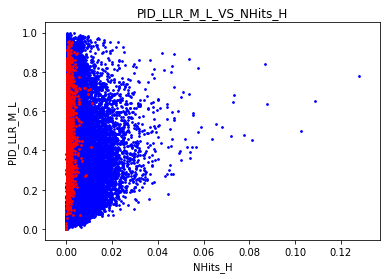

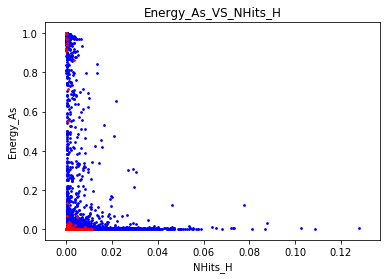

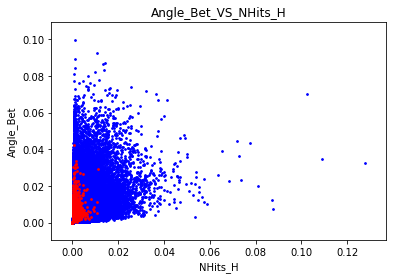

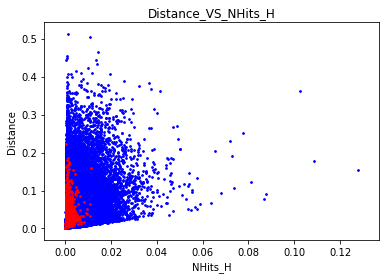

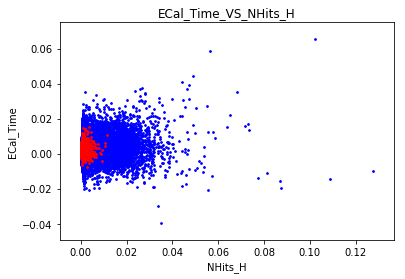

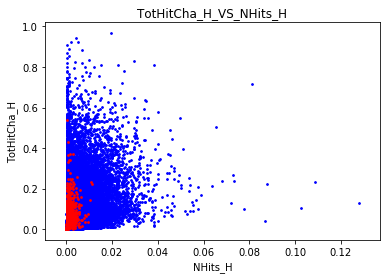

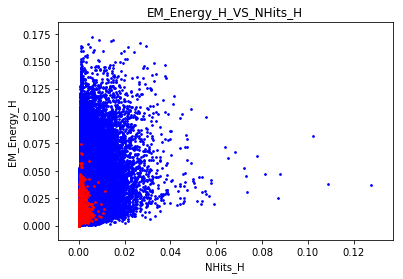

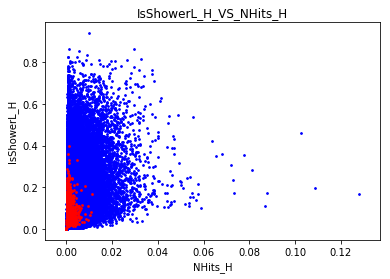

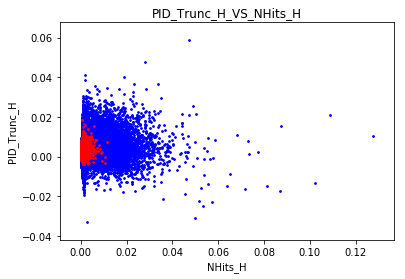

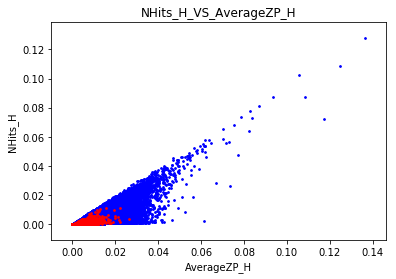

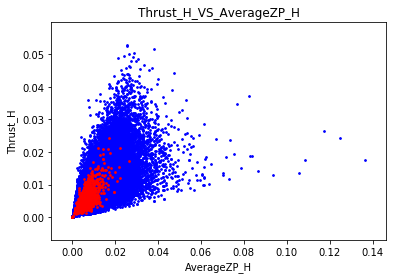

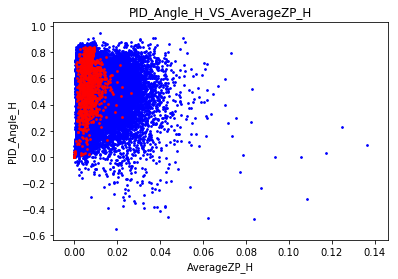

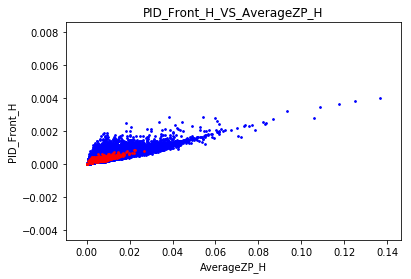

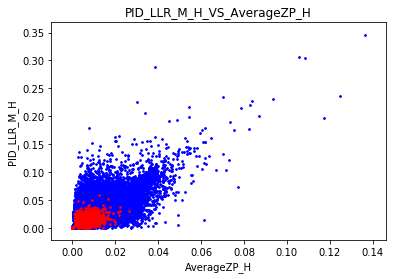

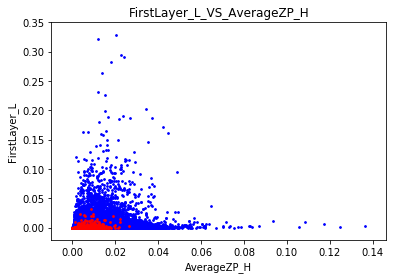

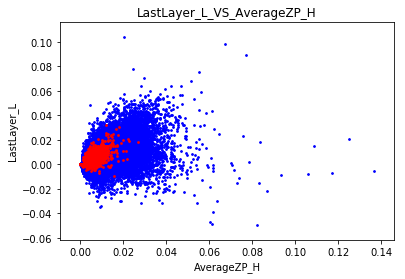

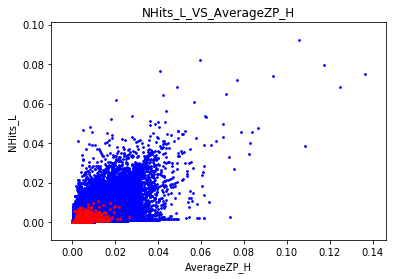

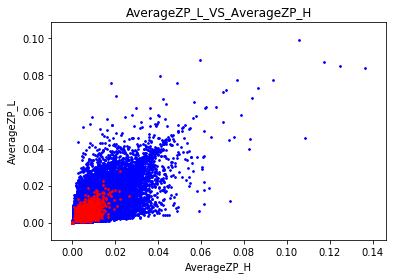

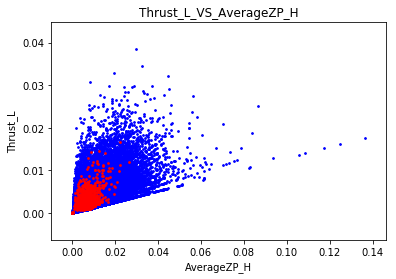

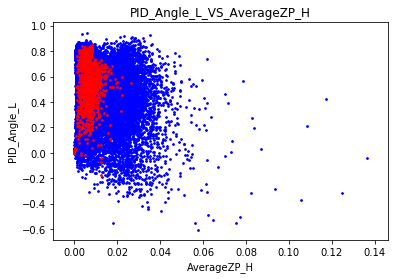

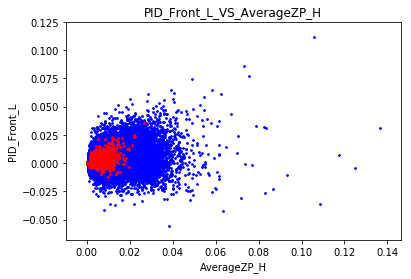

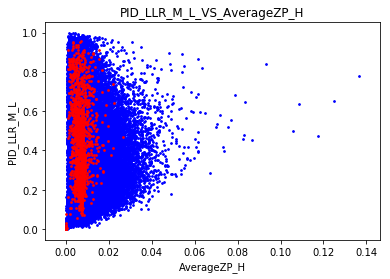

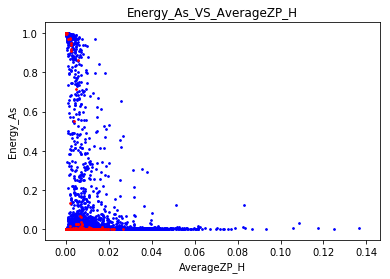

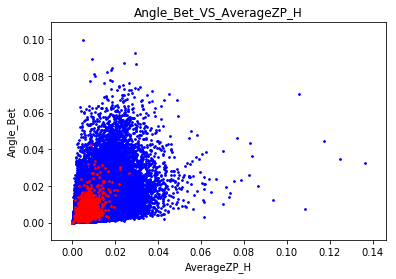

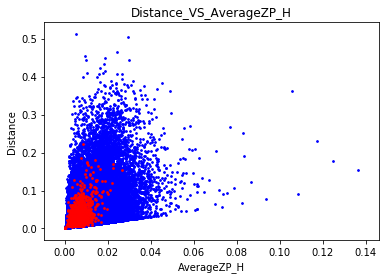

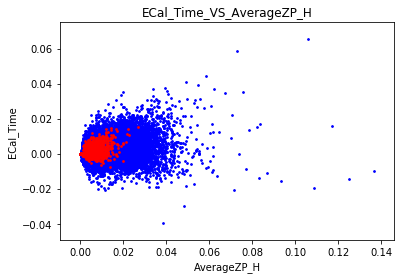

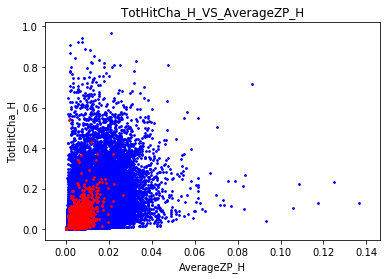

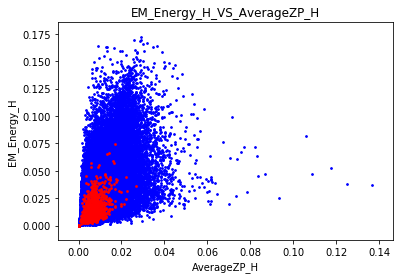

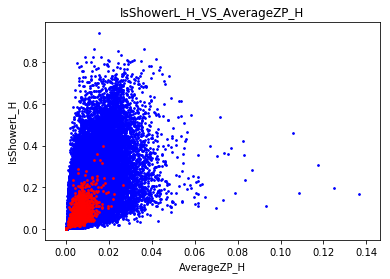

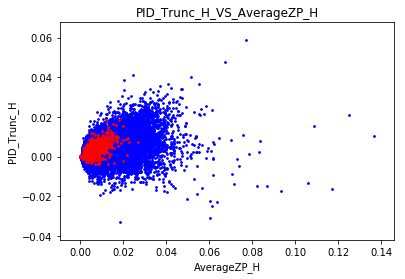

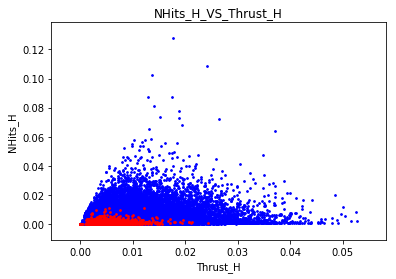

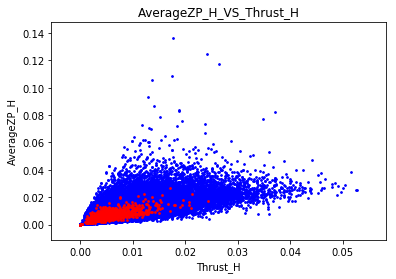

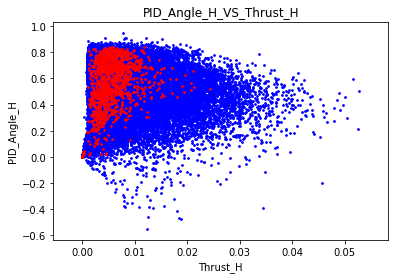

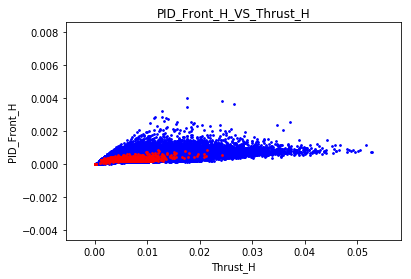

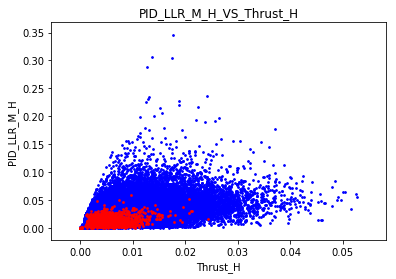

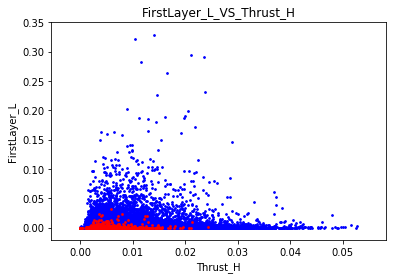

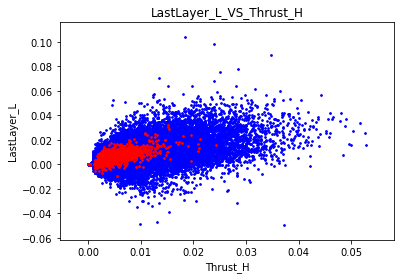

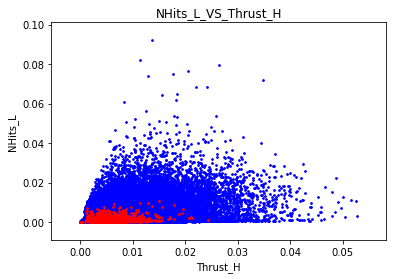

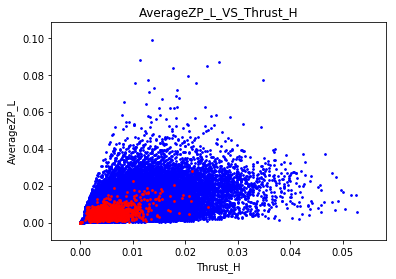

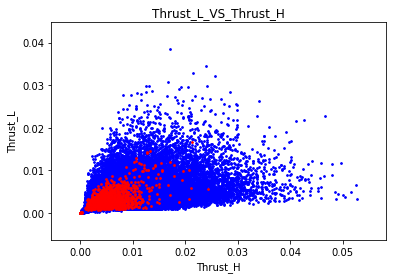

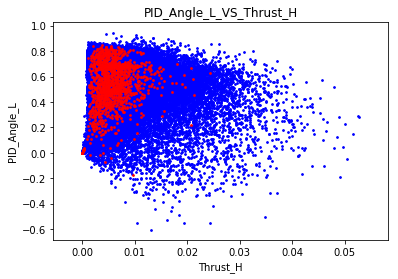

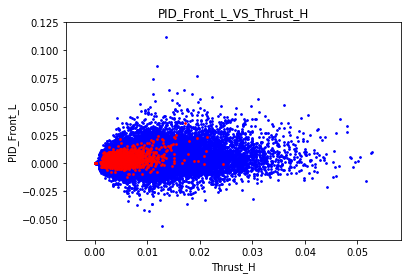

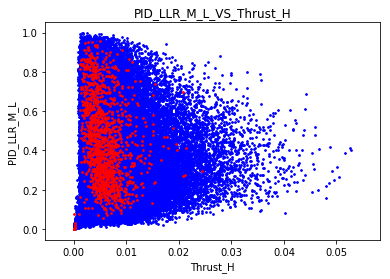

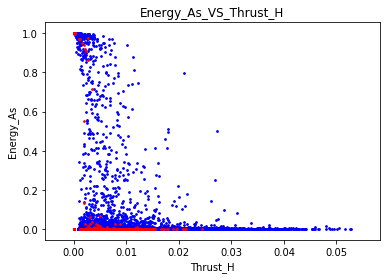

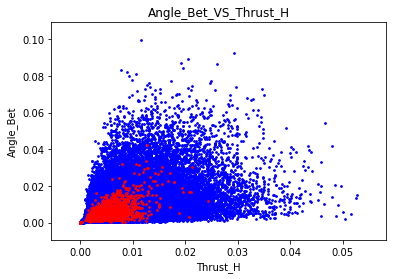

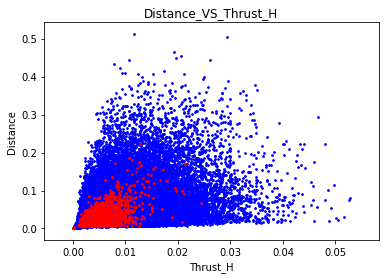

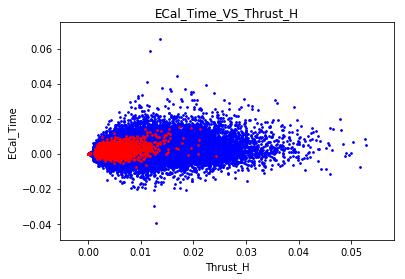

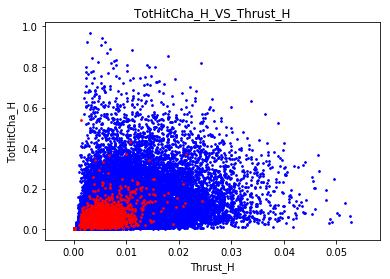

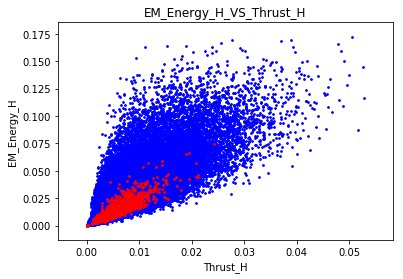

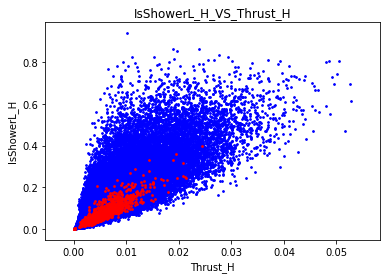

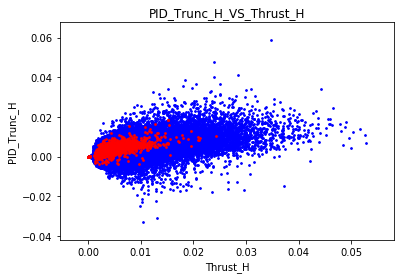

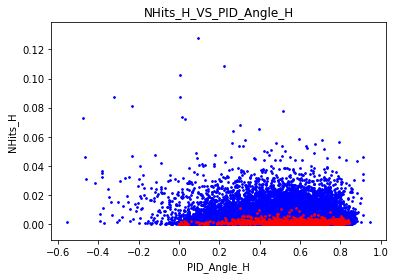

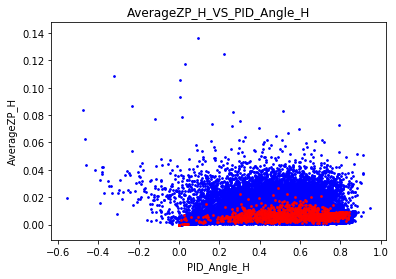

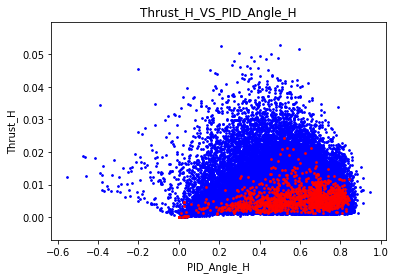

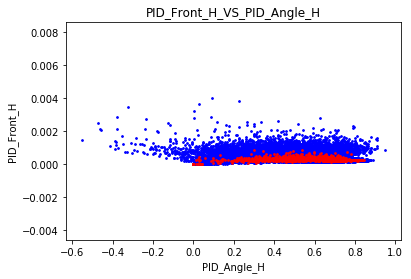

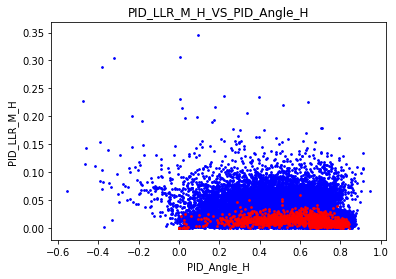

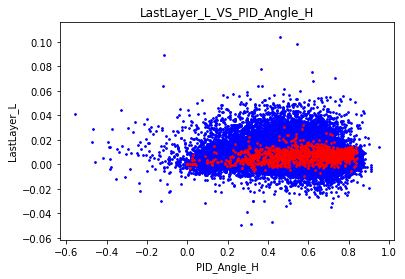

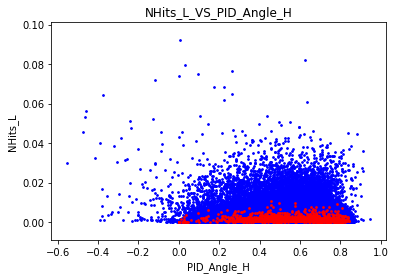

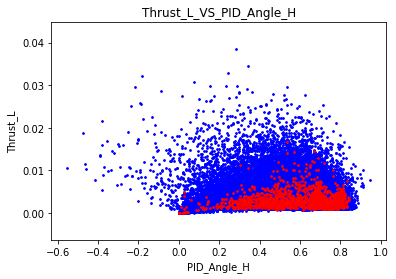

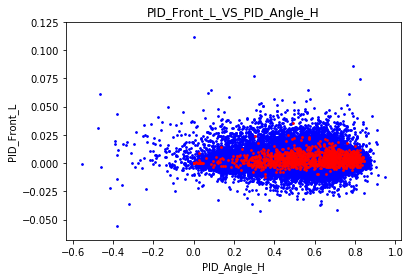

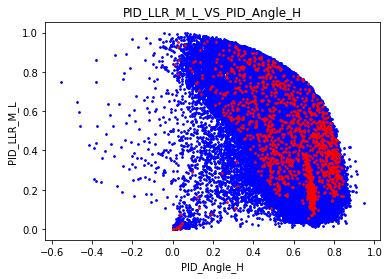

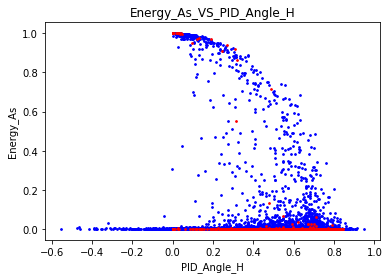

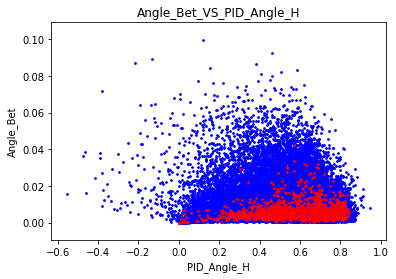

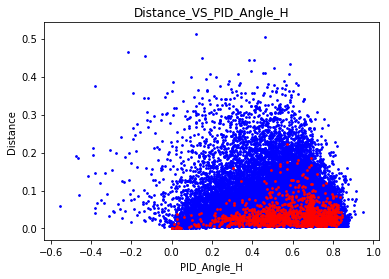

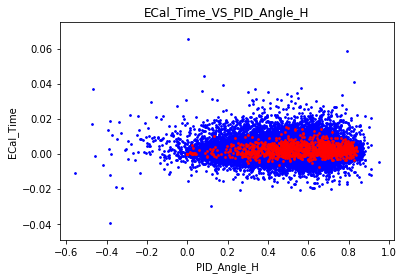

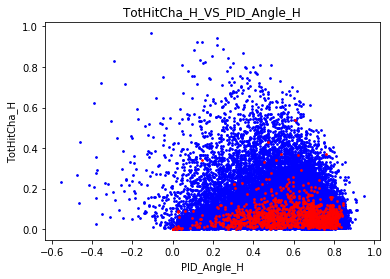

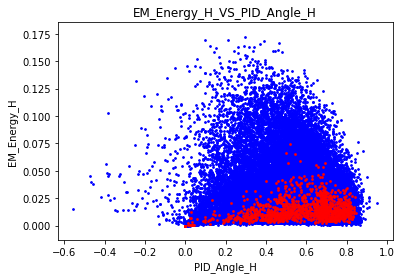

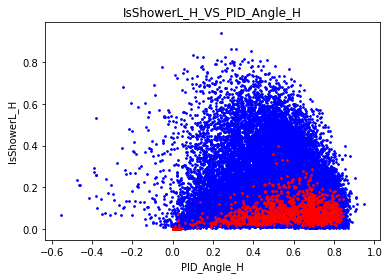

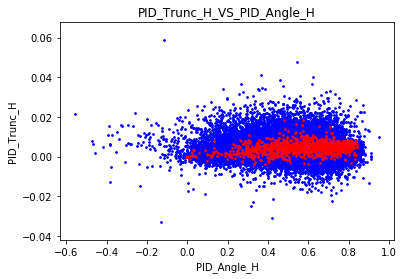

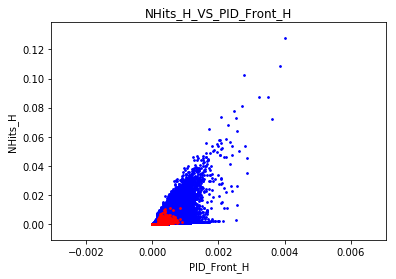

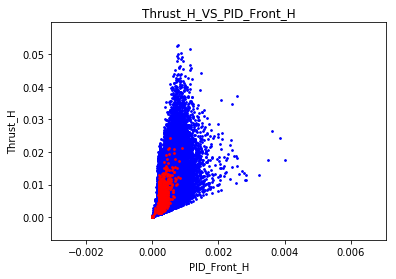

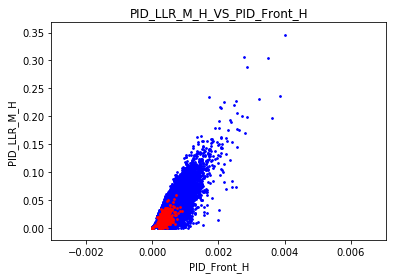

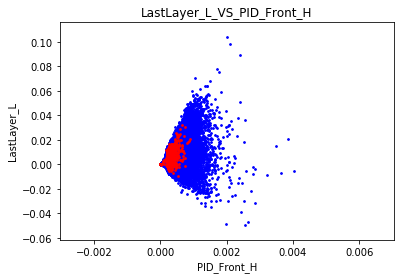

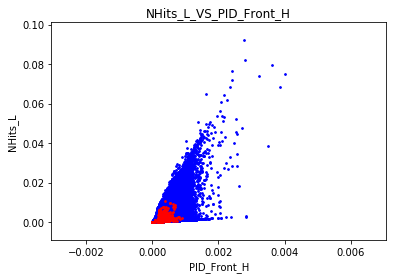

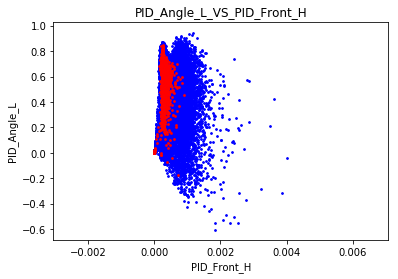

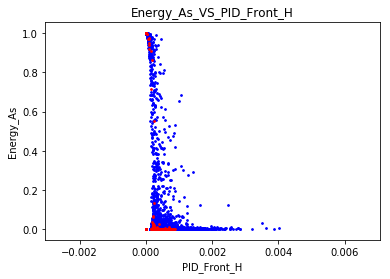

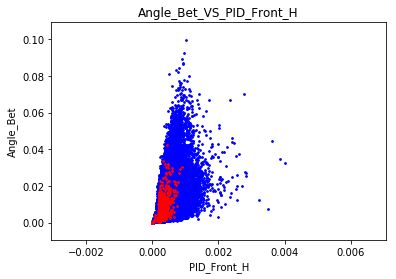

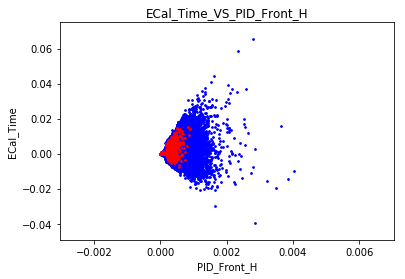

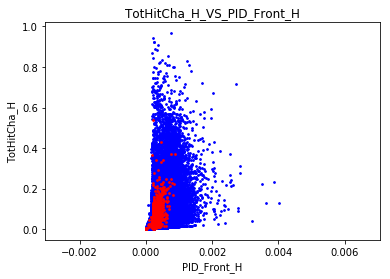

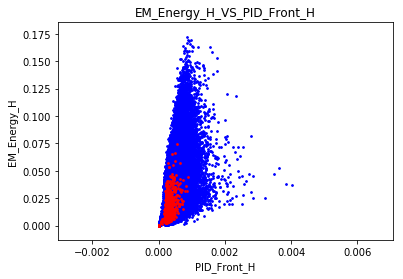

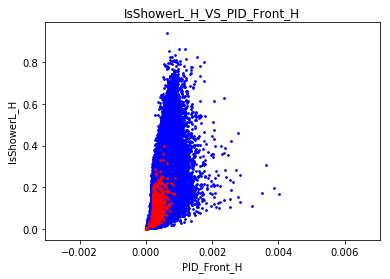

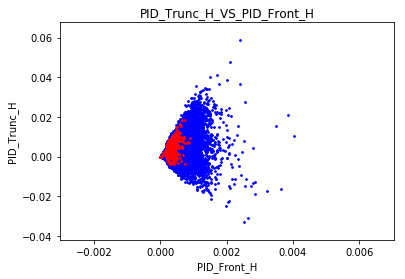

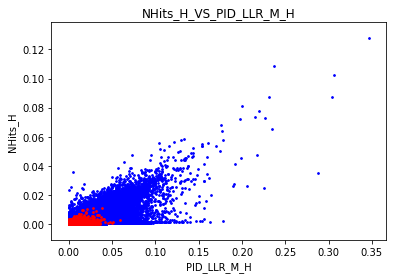

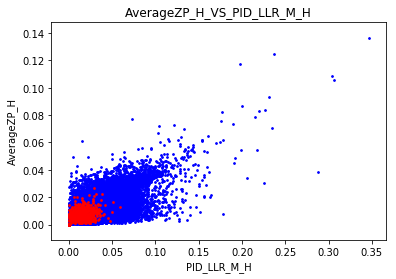

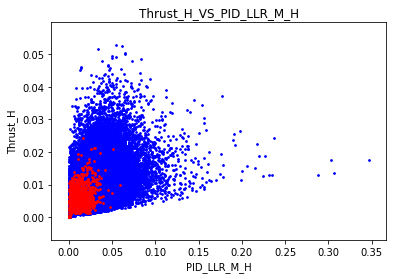

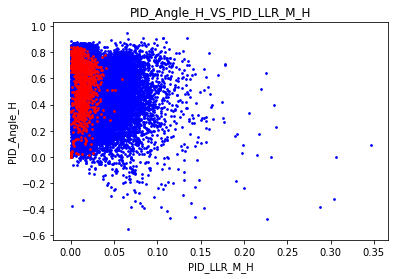

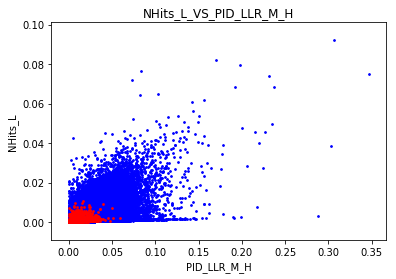

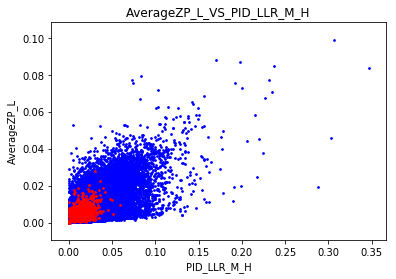

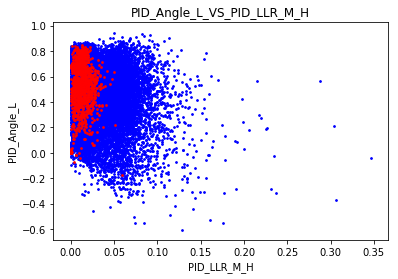

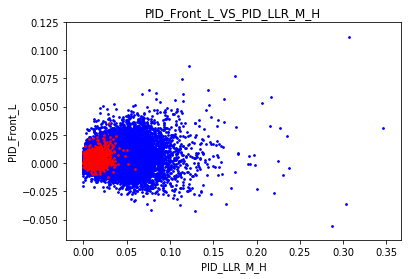

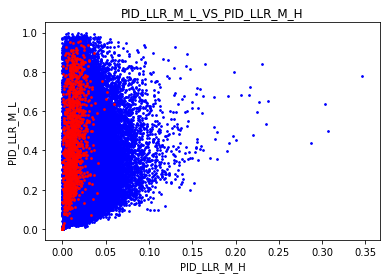

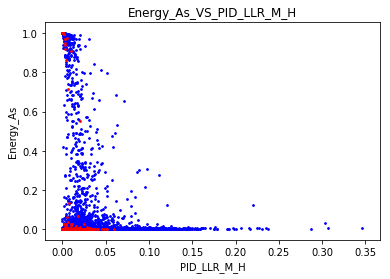

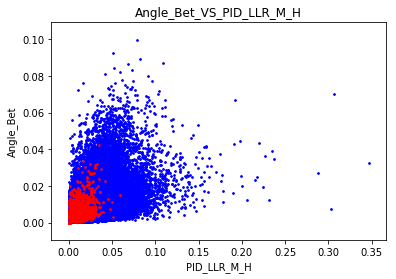

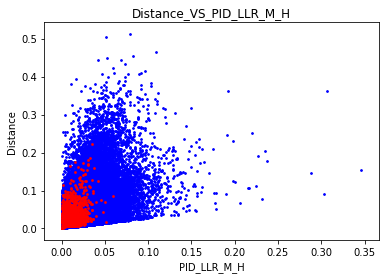

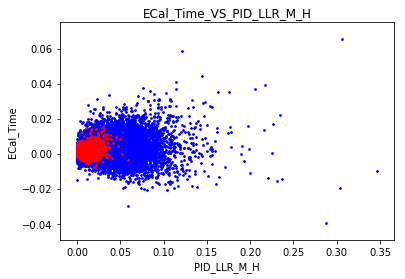

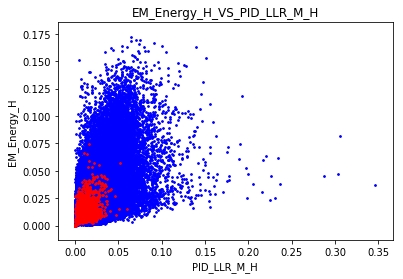

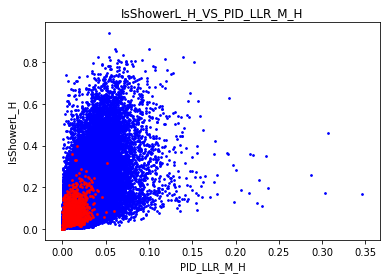

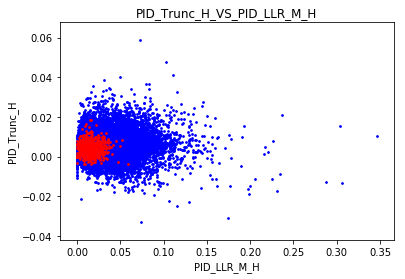

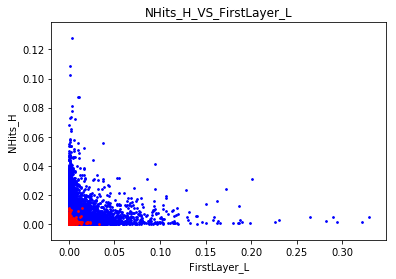

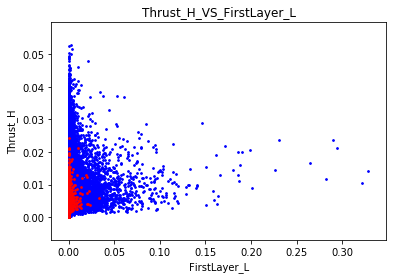

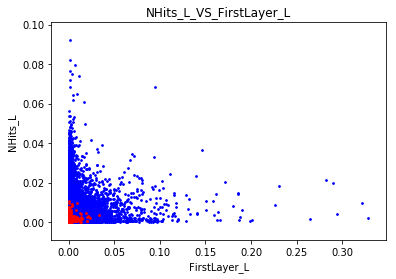

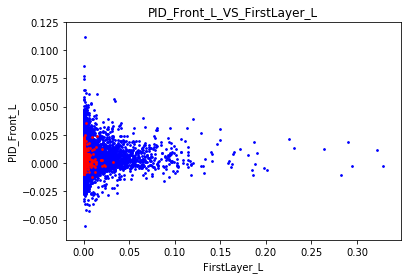

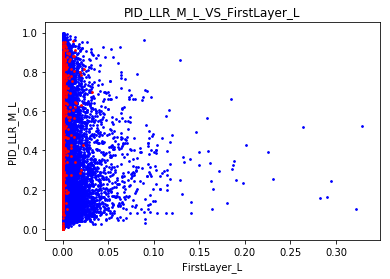

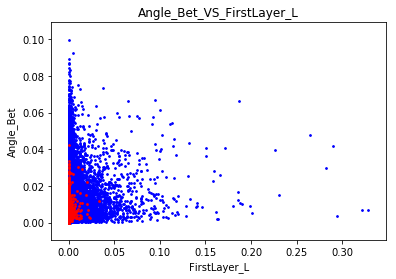

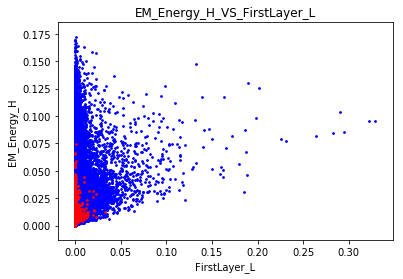

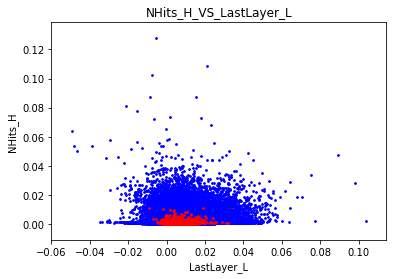

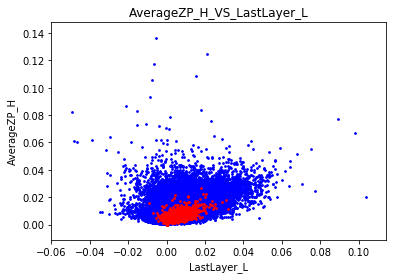

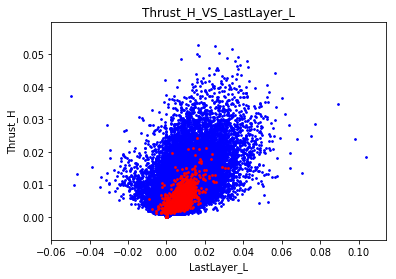

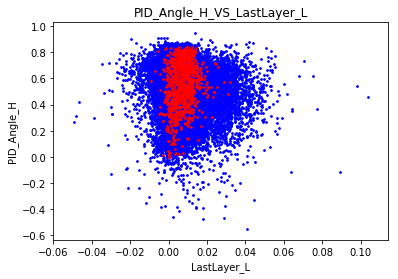

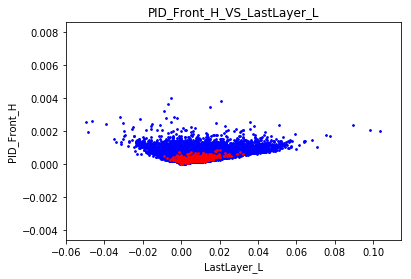

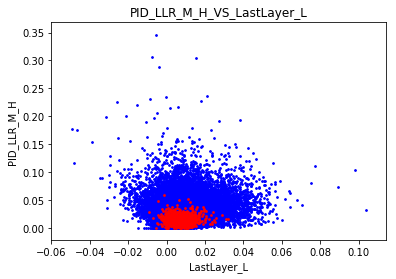

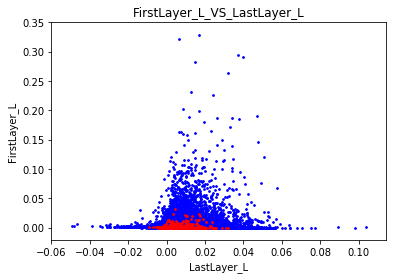

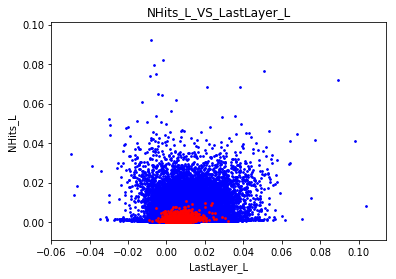

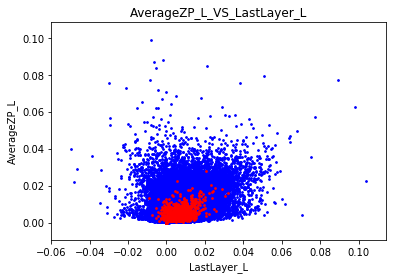

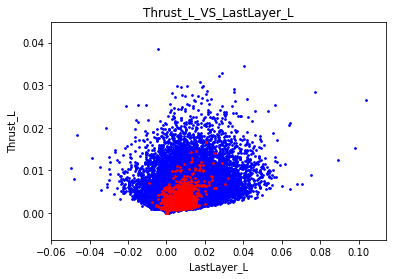

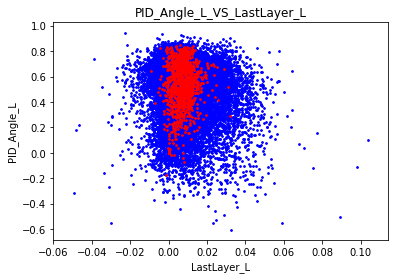

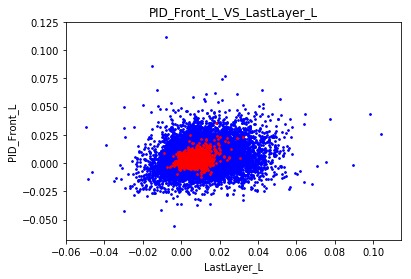

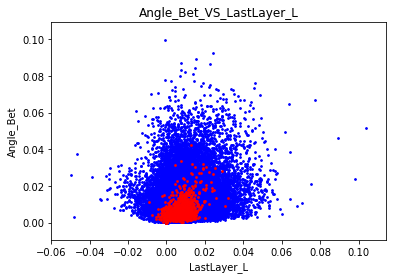

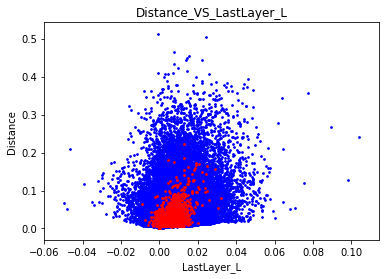

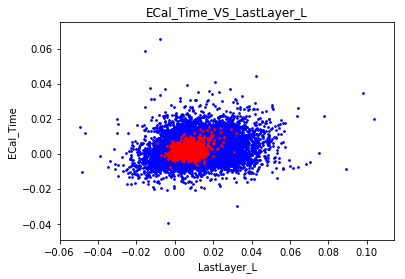

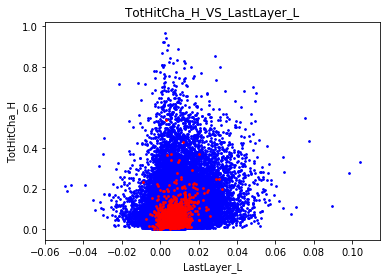

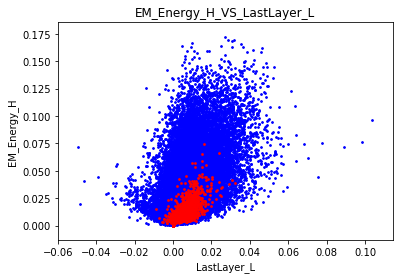

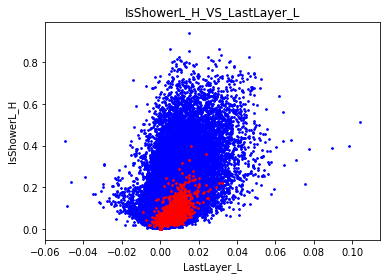

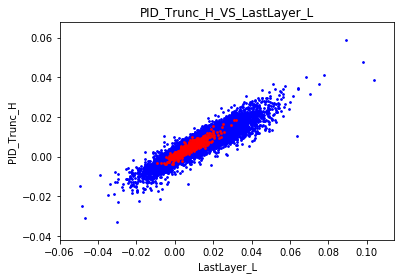

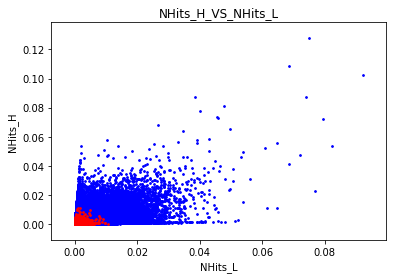

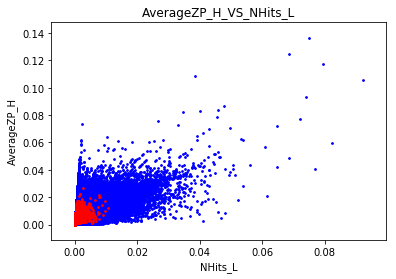

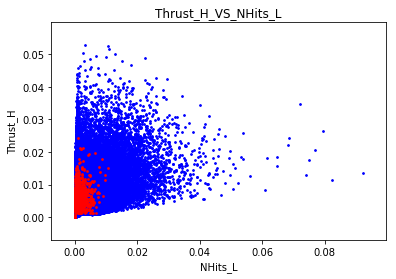

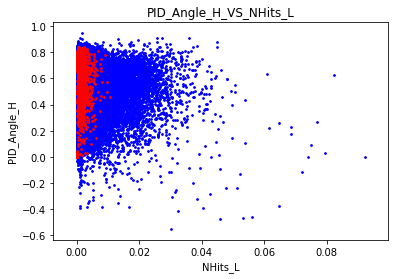

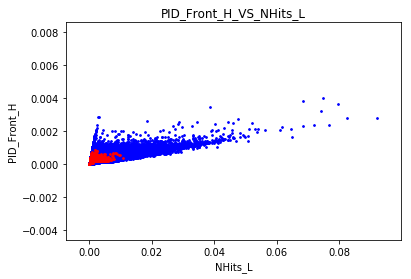

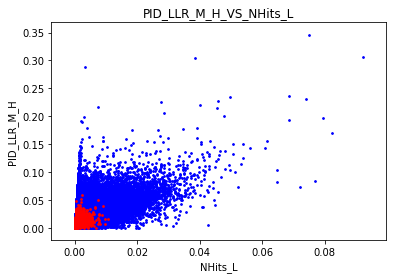

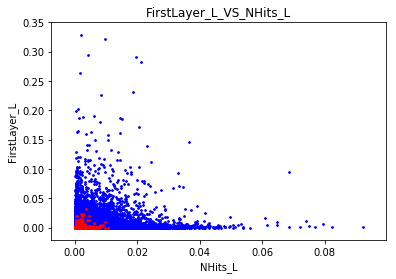

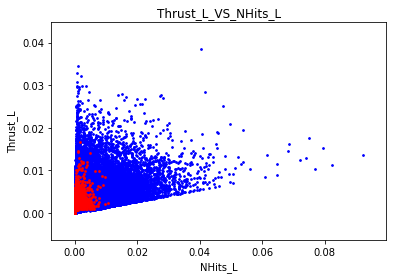

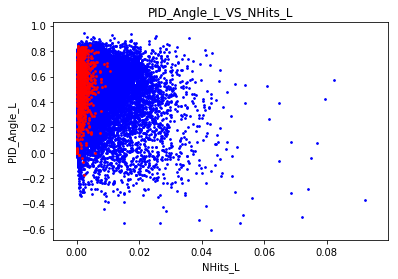

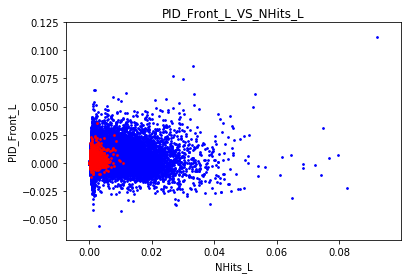

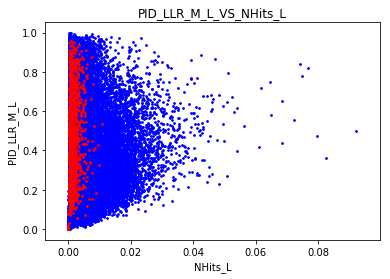

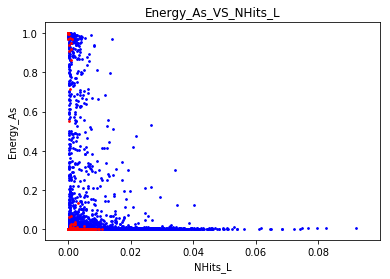

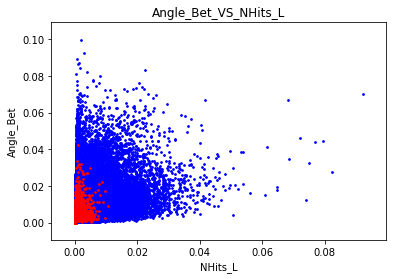

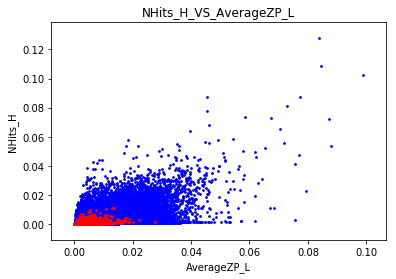

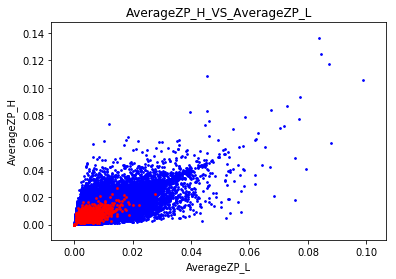

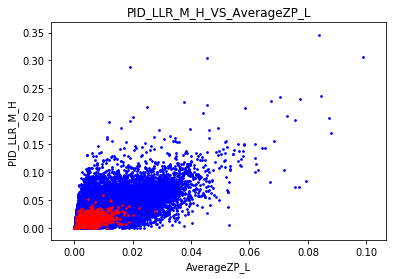

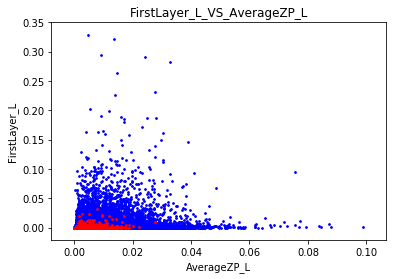

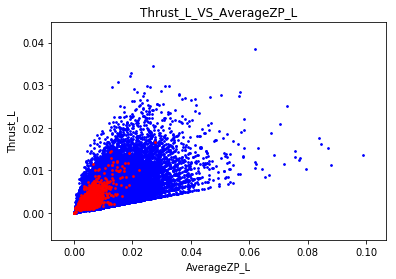

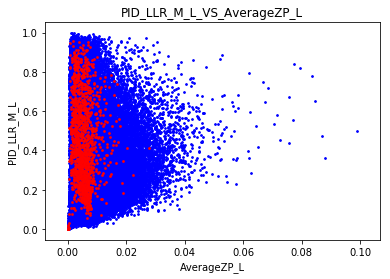

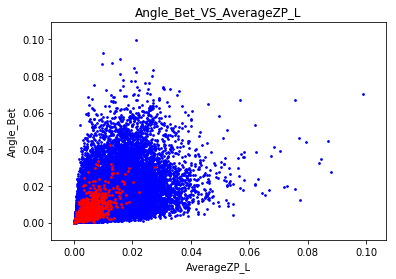

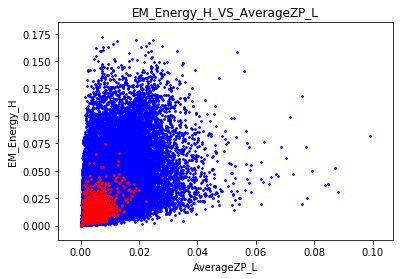

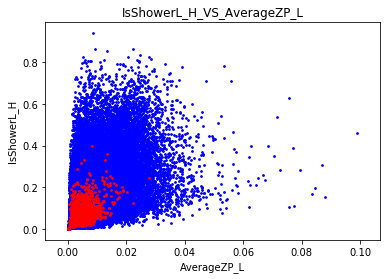

--- 121.06670928001404 seconds ---


In [15]:
#superplot!
size = 3
#save_results_to = '/home/willett/ANNs/HumanDataAPlots/'

start_time = time.time()

for i in np.arange(2,12):
    for j in np.arange(2,24):
        if i!=j:
            plottitle = titleArr[j]+"_VS_"+titleArr[i]
            
            plt.scatter(UDBg[:,i],UDBg[:,j],c="b",s=size)
            plt.scatter(UDSig[:,i],UDSig[:,j],c="r",s=size)
            plt.title(plottitle)
            plt.ylabel(titleArr[j])
            plt.xlabel(titleArr[i])
            #plt.savefig(save_results_to + plottitle, dpi = 300)
                
            plt.show()
            
print("--- %s seconds ---" % (time.time() - start_time)) 

## in these images you can see there is human cutting to be done, thses human cuts will aid the NN

In [16]:
print(Data3titleArr)

['FirstLayer_H' 'LastLayer_H' 'NHits_H' 'AverageZP_H' 'Thrust_H'
 'PID_Angle_H' 'PID_Front_H' 'PID_LLR_M_H' 'FirstLayer_L' 'LastLayer_L'
 'NHits_L' 'AverageZP_L' 'PID_LLR_M_L' 'Distance' 'ECal_Time'
 'TotHitCha_H' 'EM_Energy_H' 'PID_LLR_M_H' 'ObjectLen_H' 'TotHitCha_L'
 'EM_Energy_L' 'PID_LLR_M_L' 'ObjectLen_L']


In [17]:
# deleting extraneous data points

#signal distance trim > 0.3
#N_hits_H, trim > 0.005
#PID_Front_H, trim > 0.01
#First_Layer_L trim > 0.04
#N_hits_L, trim > 0.01
#PID_LLR_M_H trim > 0.05

RemoveIndex = np.logical_not(\
  (ExtOut3[:,15]>0.3)\
| (ExtOut3[:,4]>0.005)\
| (ExtOut3[:,8]>0.01)\
| (ExtOut3[:,10]>0.04)\
| (ExtOut3[:,12]>0.005)\
| (ExtOut3[:,9]>0.05)\
                            )


# placing in new table
ExtOutClean = ExtOut3[RemoveIndex]

print(RemoveIndex[27:190])
print(ExtOut3.shape, ExtOutClean.shape)





[False False  True False False False False False  True False False False
 False False False False False False False False False False False False
  True  True False False False  True False  True  True False  True False
 False False False False False  True False False  True False False  True
 False  True False False False False  True False  True False False False
 False False False  True False False False False  True False False False
  True False False False False False False False False False False False
 False  True  True False False False  True  True False False  True False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False  True
 False False  True False False False False  True False False False False
 False False False False False False False False  True False False False
 False False False False False False False]
(57561,

In [18]:
#pick dataset to plot
UD = ExtOutClean

#seperate signal and background
UDSig = UD[   np.where(    UD[:,0]==1     )   ]
UDBg = UD[   np.where(    UD[:,0]!=1     )   ]
print(UDSig.shape, UDBg.shape)

(159, 25) (10287, 25)


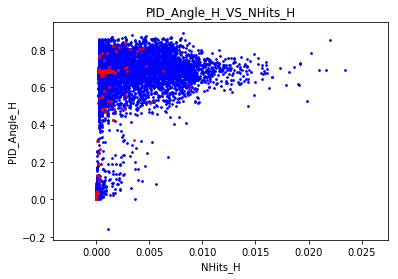

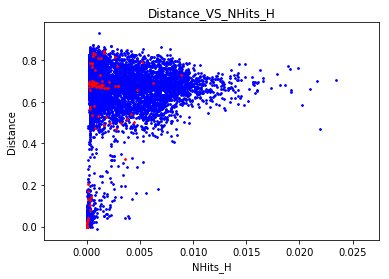

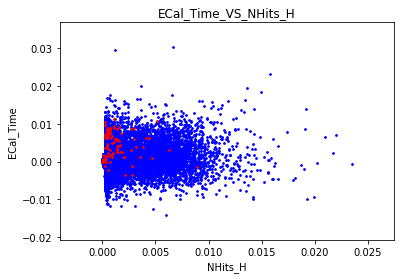

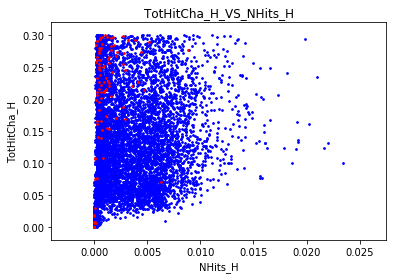

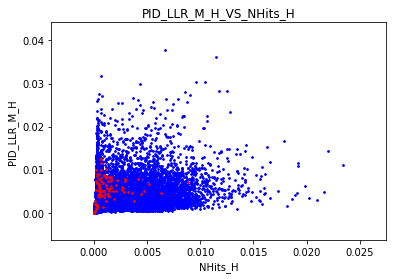

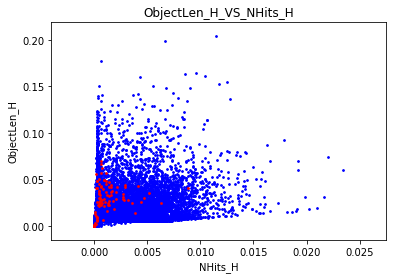

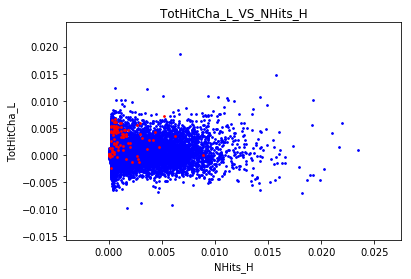

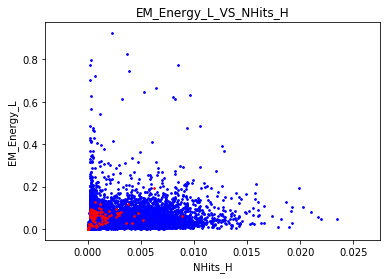

IndexError: index 23 is out of bounds for axis 0 with size 23

In [22]:
#superplot!
size = 3
#save_results_to = '/home/willett/ANNs/HumanDataAPlots/'

start_time = time.time()
titleArr = Data3titleArr
for i in np.arange(2,12):
    for j in np.arange(2,24):
        if i!=j:
            plottitle = titleArr[j]+"_VS_"+titleArr[i]
            
            plt.scatter(UDBg[:,i],UDBg[:,j],c="b",s=size)
            plt.scatter(UDSig[:,i],UDSig[:,j],c="r",s=size)
            plt.title(plottitle)
            plt.ylabel(titleArr[j])
            plt.xlabel(titleArr[i])
            #plt.savefig(save_results_to + plottitle, dpi = 300)
                
            plt.show()
            
print("--- %s seconds ---" % (time.time() - start_time)) 

## Save the now super trimmed data...

In [20]:
Length = ExtOutClean.shape[0]
TrainLength = int(0.9* Length)
SmallSize = 0
print(ExtOutClean.shape)
# split 
trainT = ExtOutClean[SmallSize:(TrainLength+SmallSize),:]
print("train:",trainT.shape)
testT = ExtOutClean[(TrainLength+SmallSize):,:]
print("test:",testT.shape)

#print(TrainLength)
#ExtOut[0,:]

(10446, 25)
train: (9401, 25)
test: (1045, 25)


In [21]:
# and save

#train
start_time = time.time()
np.savetxt("/home/willett/ExtendedNeutrinoData/extended_train_CNN_input_super_processed.txt",trainT, header= finaltitle)
print("--- %s seconds ---" % (time.time() - start_time))

#test
start_time = time.time()
np.savetxt("/home/willett/ExtendedNeutrinoData/extended_test_CNN_input_super_processed.txt",testT, header= finaltitle)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.4694364070892334 seconds ---
--- 0.07292413711547852 seconds ---
